In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model
import os.path

import time

from NeuralNetDP import NeuralNet
#from utils.json import *

np.random.seed(1)

In [8]:
(np.random.rand(2,2) - 0.5)*0.01

array([[-0.00082978,  0.00220324],
       [-0.00499886, -0.00197667]])

In [9]:
df = pd.read_csv("../data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X, Y = df.drop('label', axis=1), df['label']
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(42000, 784), y=(42000,)


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.values.reshape((Y.shape[0], 1)), test_size = 0.2, random_state=10) # Y.values

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
encoder = OneHotEncoder()

In [14]:
Y_train.shape

(33600, 1)

In [15]:
Y_train_e = encoder.fit_transform(Y_train).toarray()
Y_train_e.shape

(33600, 10)

In [39]:
cls = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 100, \
                         normalize = False, mini_batch_size=2048,
               random_layer = 2, random_layer_coef=10)

(60, 784)
(10, 60)
Cost after iteration 0: 0.227535
Cost after iteration 10: 0.059322
Cost after iteration 20: 0.038320
Cost after iteration 30: 0.032053
Cost after iteration 40: 0.030069
Cost after iteration 50: 0.029938
Cost after iteration 60: 0.024201
Cost after iteration 70: 0.022855
Cost after iteration 80: 0.023185
Cost after iteration 90: 0.020702


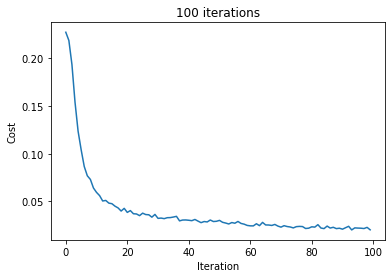

In [40]:
cls.fit(X_train, Y_train_e)

Cost after iteration 0: 0.019872
Cost after iteration 10: 0.018166
Cost after iteration 20: 0.018344
Cost after iteration 30: 0.018761
Cost after iteration 40: 0.017310
Cost after iteration 50: 0.016923
Cost after iteration 60: 0.017089
Cost after iteration 70: 0.014718
Cost after iteration 80: 0.014072
Cost after iteration 90: 0.014842
Cost after iteration 100: 0.013142
Cost after iteration 110: 0.013550
Cost after iteration 120: 0.012761
Cost after iteration 130: 0.014207
Cost after iteration 140: 0.011230
Cost after iteration 150: 0.012979
Cost after iteration 160: 0.014032
Cost after iteration 170: 0.011581
Cost after iteration 180: 0.010229
Cost after iteration 190: 0.011197


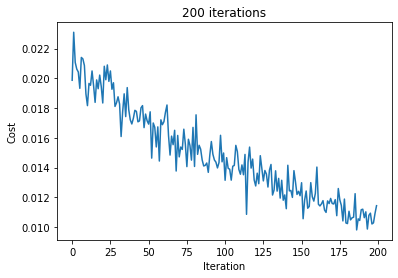

In [41]:
cls.keep_fitting(X_train, Y_train_e, 200)

In [42]:
cls.num_iter

300

In [43]:
Y_train_hat = cls.predict(X_train)
Y_test_hat = cls.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

0.9708333333333333
0.9573809523809523


In [21]:
import json

def save_to_json(parameters, file_name):
  serializable_dict = {}
  for key in parameters.keys():
    serializable_dict[key] = parameters[key].tolist()

  with open(file_name + ".json", "w") as write_file:
    json.dump(serializable_dict, write_file)

In [44]:
save_to_json(cls.parameters, "../nets/main_nn_300_DP_2_10")

In [ ]:
cls.T = 100

In [ ]:
Y_dist = cls.predict_proba(X_train)
np.round(Y_dist[:10], 2)

## Distillation

In [ ]:
cls_dist = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 300, \
                         normalize = False, mini_batch_size=2048, T=T)

In [ ]:
cls_dist.fit(X_train, Y_dist)

In [ ]:
cls_dist.num_iter

In [ ]:
Y_train_hat = cls_dist.predict(X_train)
Y_test_hat = cls_dist.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

In [ ]:
save_to_json(cls_dist.parameters, "nets/distilled_nn_300_T_"+str(T))